In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from skimage import exposure

In [20]:
digits=load_digits()
digits.data.shape

(1797, 64)

In [21]:
X= digits.data
y= digits.target

#reshape for 2D arrays
X= X.reshape(-1,8,8)

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_test

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 14., ...,  0., 12.,  0.],
        [ 0.,  0.,  8., ...,  5., 16.,  2.],
        [ 0.,  0.,  0., ..., 14.,  5.,  0.]],

       [[ 0.,  0., 11., ...,  0.,  0.,  0.],
        [ 0.,  6., 16., ...,  9.,  0.,  0.],
        [ 0.,  7., 16., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 16.,  5.,  0.],
        [ 0.,  0.,  3., ..., 11.,  0.,  0.],
        [ 0.,  0., 13., ...,  1.,  0.,  0.]],

       [[ 0.,  0.,  8., ...,  4.,  0.,  0.],
        [ 0.,  5., 14., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ...,  3.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 13.,  5.,  0.],
        [ 0.,  0., 12., ..., 12.,  7.,  0.],
        [ 0.,  0., 13., ...,  8.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  7., ...,  8.,  0.,  0.],
        [ 0.,  0., 16., ..., 15.,  3.,  0.],
        [ 0.,  4., 16., ..., 13.,  4.,  0.

In [22]:
X.shape

(1797, 8, 8)

In [23]:
#preprocess images

X_processed= []

for image in X:
    p2,p98 =np.percentile(image,(2,98))
    rescale= exposure.rescale_intensity(image,in_range=(2,98))

    flat= rescale.flatten()
    X_processed.append(flat)

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X_processed,y, test_size=0.2, random_state=42)

In [25]:
forest = RandomForestClassifier(random_state=42)

In [26]:
# fitting model
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
#predctions on test set
y_pred= forest.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 1, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [28]:
#evaluating classifier
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred, average= 'macro'))
print('recall:',recall_score(y_test,y_pred, average= 'macro'))
print('f1:',f1_score(y_test,y_pred, average= 'macro'))

accuracy: 0.9722222222222222
precision: 0.9729971241467723
recall: 0.9716328446272126
f1: 0.9716597182901474


In [29]:
parameters= {
    'n_estimators': [10,20,30,],
    'max_depth': [None, 10,20],
    'min_samples_split': [2,5,10]
}

gridsearch=  GridSearchCV(forest,parameters,cv=5)
gridsearch.fit(X_train,y_train)
# use gridsearch to find the best parameters

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [30]:
# trained with best parametres
best_forest= gridsearch.best_estimator_
best_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=42)

In [31]:
# predicitons woth best classifier
ypredbest= best_forest.predict(X_test)
ypredbest

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [32]:
#evaluating best classifier
print('accuracy:',accuracy_score(y_test,ypredbest))
print('precision:',precision_score(y_test,ypredbest, average= 'macro'))
print('recall:',recall_score(y_test,ypredbest, average= 'macro'))
print('f1:',f1_score(y_test,ypredbest, average= 'macro'))

accuracy: 0.9694444444444444
precision: 0.9708613897037799
recall: 0.9669899874843553
f1: 0.9687035986589526


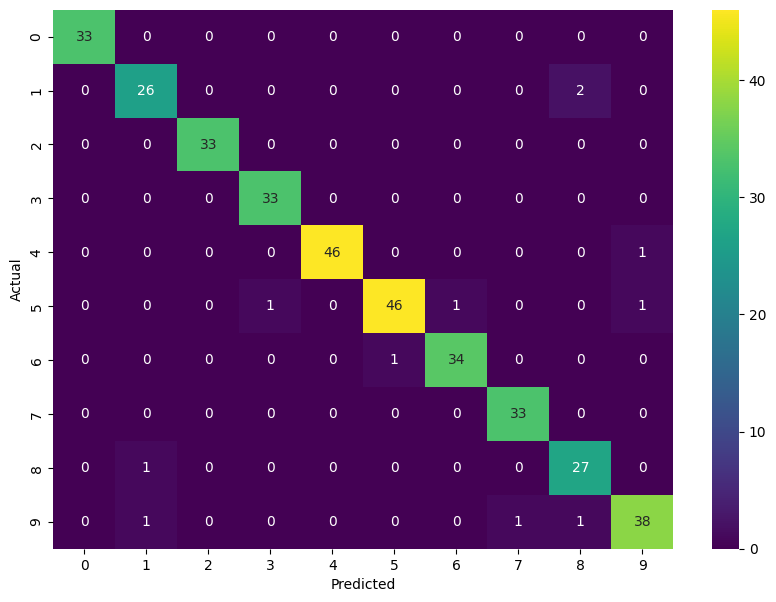

In [33]:
# confusion matrix change this to my values

from sklearn.metrics import confusion_matrix
# cm= confusion_matrix(y_test,y_pred)
# cm
#Confusion matrix for Random Forest model on test set 
conf_matrix = confusion_matrix(ypredbest, y_test) 

cm_df = pd.DataFrame(conf_matrix) 
cm_df 

plt.figure(figsize = (10,7)) 
sns.heatmap(cm_df, cmap = 'viridis', annot = True, fmt = "d") 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()
